# Lecture de la base de donnée

La base de donnée sera lue à partir d'un fichier csv correspondant en terme de structure à [example.csv](example.csv). <br>
Ce fichier contient trois colonnes : fichier csv contenant le chromatograme, etat normal(1) ou non(0), label : description.

Comme dans [readData.ipynb](readData.ipynb), on importe les modules utiles.

In [2]:
import pandas as pd
import tools
from importlib import reload
reload(tools)

pd.options.plotting.backend = "plotly"

On spécifie le chemin du fichier dans lequel est stocké la base de donnée dans la variable `FILE`, et le chemin jusqu'aux chromatogrammes mentionnés dans la base de donnée dans la variable : `PATH`. <br>

In [3]:
FILE = "../data/example.csv"
PATH = "../data/chromatograms/"

On met les informations de la base de donnée dans un DataFrame (`db`), dans lequel on remplacera les 1 et 0 dans la colonne `normal` par respectivement `True` et `False` si besoin dans la suite du traitement.

In [4]:
db = pd.read_csv(FILE, index_col=False, names=['file', 'normal', 'label'])
print(db)

                          file  normal  \
0  Test1-20210625-CHROMATOGRAM       1   
1  Test2-20211012-CHROMATOGRAM       0   
2  Test3-20210602-CHROMATOGRAM       0   

                                               label  
0   Pas d'évidence de trouble d'ordre métabolique...  
1                  Suivi d'acidurie méthylmalonique.  
2   Suivi d'acidurie méthylmalonique. Profil inha...  


In [5]:
db['normal'] = db['normal'].astype('bool')
print(db)

                          file  normal  \
0  Test1-20210625-CHROMATOGRAM    True   
1  Test2-20211012-CHROMATOGRAM   False   
2  Test3-20210602-CHROMATOGRAM   False   

                                               label  
0   Pas d'évidence de trouble d'ordre métabolique...  
1                  Suivi d'acidurie méthylmalonique.  
2   Suivi d'acidurie méthylmalonique. Profil inha...  


Ensuite plutôt que d'avoir uniquement le nom des chromatogrammes, on peut récupérer les courbes traitées avec la fonction `readListOfData`.

In [6]:
db['chromato'] = tools.readListOfData(db['file'], PATH)
print(db)

                          file  normal  \
0  Test1-20210625-CHROMATOGRAM    True   
1  Test2-20211012-CHROMATOGRAM   False   
2  Test3-20210602-CHROMATOGRAM   False   

                                               label  \
0   Pas d'évidence de trouble d'ordre métabolique...   
1                  Suivi d'acidurie méthylmalonique.   
2   Suivi d'acidurie méthylmalonique. Profil inha...   

                                    chromato  
0  <tools.Data object at 0x00000164D9C1CBE0>  
1  <tools.Data object at 0x00000164D9BEEC10>  
2  <tools.Data object at 0x00000164D8C6A8B0>  


In [7]:
db['chromato'][0].df.plot()

Sélection des colonnes pour l'entrainement du réseau (dans le cas normal/non normal)

In [8]:
db.loc[:, ['chromato', 'normal']]

,chromato,normal
0,<tools.Data object at 0x00000164D9C1CBE0>,True
1,<tools.Data object at 0x00000164D9BEEC10>,False
2,<tools.Data object at 0x00000164D8C6A8B0>,False


Exemple de données sous forme de matrice pour l'utilisation en machine learning avec scikit-learn, et affichage du preier chromatogramme.

En entrée : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
En sortie :  [1 0 0]


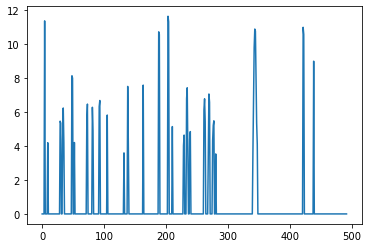

In [11]:
import matplotlib.pyplot as plt
X, y = tools.getData(FILE, PATH)
print("En entrée : \n", X, "\nEn sortie : ", y)
plt.plot(X[0, :])
plt.show()